# **This is the solution to Dr. Zaher's homework**
# Khaled Saleh : 2232890             |  Mohanad Assaf : 2233114

## **Import Packages**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from docx import Document # conda install conda-forge::python-docx

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## **Read The DataSets**

In [2]:
df1 = pd.read_csv('Scoring-Dataset-1.csv')
df2 = pd.read_csv('Scoring-Dataset-2.csv')
df3 = pd.read_csv('Scoring-Dataset-3.csv')
df4 = pd.read_csv('Scoring-Dataset-4.csv')
df5 = pd.read_csv('Scoring-Dataset-5.csv')
df6 = pd.read_csv('Scoring-Dataset-6.csv')
df7 = pd.read_csv('Scoring-Dataset-7.csv')
df8 = pd.read_csv('Scoring-Dataset-8.csv')
df9 = pd.read_csv('Scoring-Dataset-9.csv')
df10 = pd.read_csv('Scoring-Dataset-10.csv')
df11 = pd.read_csv('Scoring-Dataset-11.csv')
df12 = pd.read_csv('Scoring-Dataset-12.csv')
df13 = pd.read_csv('Scoring-Dataset-13.csv')
df14 = pd.read_csv('Scoring-Dataset-14.csv')
df15 = pd.read_csv('Scoring-Dataset-15.csv')
df16 = pd.read_csv('Scoring-Dataset-16.csv')
df17 = pd.read_csv('Scoring-Dataset-17.csv')
df18 = pd.read_csv('Scoring-Dataset-18.csv')
df19 = pd.read_csv('Scoring-Dataset-19.csv')
df20 = pd.read_csv('Scoring-Dataset-20.csv')
df21 = pd.read_csv('Scoring-Dataset-21.csv')
df22 = pd.read_csv('Scoring-Dataset-22.csv')
df23 = pd.read_csv('Scoring-Dataset-23.csv')
df24 = pd.read_csv('Scoring-Dataset-24.csv')
df25 = pd.read_csv('Scoring-Dataset-25.csv')
df26 = pd.read_csv('Scoring-Dataset-26.csv')
df27 = pd.read_csv('Scoring-Dataset-27.csv')
df28 = pd.read_csv('Scoring-Dataset-28.csv')
df29 = pd.read_csv('Scoring-Dataset-29.csv')
df30 = pd.read_csv('Scoring-Dataset-30.csv')

# concat the whole datasets in one dataset because it is easier to deal with :)
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,
        df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30], axis=0)

In [3]:
print(df.shape)
df

(9000, 10)


,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method
0,49408,M,34,M,Seldom,Yes,Yes,Yes,Yes,'Website Account'
1,16908,F,52,M,Seldom,Yes,Yes,Yes,No,'Bank Transfer'
2,76548,F,52,M,Regular,Yes,Yes,No,No,'Bank Transfer'
3,33261,M,18,M,Seldom,Yes,Yes,Yes,Yes,'Website Account'
4,42167,F,56,M,Seldom,Yes,No,Yes,Yes,'Website Account'
...,...,...,...,...,...,...,...,...,...,...
295,99190,M,25,S,Seldom,Yes,No,Yes,No,'Bank Transfer'
296,29644,M,47,S,Frequent,Yes,No,No,No,'Website Account'
297,85097,M,49,S,Regular,Yes,No,No,Yes,'Credit Card'
298,95027,F,36,S,Seldom,Yes,Yes,Yes,No,'Website Account'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    9000 non-null   int64 
 1   Gender                     9000 non-null   object
 2   Age                        9000 non-null   int64 
 3   Marital_Status             9000 non-null   object
 4   Website_Activity           9000 non-null   object
 5   Browsed_Electronics_12Mo   9000 non-null   object
 6   Bought_Electronics_12Mo    9000 non-null   object
 7   Bought_Digital_Media_18Mo  9000 non-null   object
 8   Bought_Digital_Books       9000 non-null   object
 9   Payment_Method             9000 non-null   object
dtypes: int64(2), object(8)
memory usage: 773.4+ KB


In [5]:
df.isnull().sum()

User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
dtype: int64

## **A. Initial data exploration**

### **A1. Identify the type of each attribute (nominal, ordinal, interval or ratio):**
* #### nominal: User_ID ,Gender, Marital_Status, Browsed_Electronics_12Mo, Bought_Electronics_12Mo, Bought_Digital_Media_18Mo, Bought_Digital_Books, Payment_Method
* #### ordinal: Website_Activity
* #### interval: None
* #### ratio: Age

In [6]:
doc = Document()
doc.add_heading('Data Types', 0)

doc.add_heading('Nominal:', level=1)
doc.add_paragraph().add_run('User_ID, Gender, Marital_Status,Browsed_Electronics_12Mo,\
Bought_Electronics_12Mo, Bought_Digital_Media_18Mo,Bought_Digital_Books,\
Payment_Method').bold = True

doc.add_heading('Ordinal:', level=1)
doc.add_paragraph().add_run('Website_Activity').bold = True

doc.add_heading('Interval:', level=1)
doc.add_paragraph().add_run('None').bold = True

doc.add_heading('Ratio:', level=1)
doc.add_paragraph().add_run('Age').bold = True

doc.save('A1.docx')

### **A2. Identify the values of the summarising properties for each attribute including frequency ,location and spread [e.g. value ranges of the attributes, frequency of values, distributions, medians, means, variances, percentiles, etc. - the statistics that have been covered in the lectures and materials given). Where necessary, use proper visualisations for the corresponding statistics.ics.**

In [7]:
doc = Document()
# 1. Identify values and frequency
doc.add_heading('Identify values and frequency', 0)
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Attribute: {column}")
        doc.add_heading(f"Attribute: {column}", level=1)
        
        print(df[column].value_counts())
        doc.add_paragraph(str(df[column].value_counts()))
        
        print('---------------------------------')

Attribute: Gender
Gender
M    4782
F    4218
Name: count, dtype: int64
---------------------------------
Attribute: Marital_Status
Marital_Status
M    4615
S    4385
Name: count, dtype: int64
---------------------------------
Attribute: Website_Activity
Website_Activity
Seldom      5434
Regular     2845
Frequent     721
Name: count, dtype: int64
---------------------------------
Attribute: Browsed_Electronics_12Mo
Browsed_Electronics_12Mo
Yes    8600
No      400
Name: count, dtype: int64
---------------------------------
Attribute: Bought_Electronics_12Mo
Bought_Electronics_12Mo
No     4731
Yes    4269
Name: count, dtype: int64
---------------------------------
Attribute: Bought_Digital_Media_18Mo
Bought_Digital_Media_18Mo
Yes    7191
No     1809
Name: count, dtype: int64
---------------------------------
Attribute: Bought_Digital_Books
Bought_Digital_Books
No     5149
Yes    3851
Name: count, dtype: int64
---------------------------------
Attribute: Payment_Method
Payment_Method
'Webs

### **`Note`: We would not do any calculations for the User_ID because it is just an ID 😇**

In [8]:
# 2. Location measures
print(f"Mean of Age: {df['Age'].mean()}")
print(f"Median of Age: {df['Age'].median()}")

# 3. Spread measures
print(f"Variance of Age: {df['Age'].var()}")
print(f"Standard deviation of Age: {df['Age'].std()}")
print(f"Range of Age: {df['Age'].min()} - {df['Age'].max()}")
print(f"(Q1) 25th Percentile of Age: {df['Age'].quantile(0.25)}")
print(f"(Q2) 50th Percentile of Age: {df['Age'].quantile(0.50)}")
print(f"(Q3) 75th Percentile of Age: {df['Age'].quantile(0.75)}")
print(f"IQR of Age: {df['Age'].quantile(0.75) - df['Age'].quantile(0.25)}")
#*****************************************************************************
#*****************************************************************************
# 2. Location measures
doc.add_heading('Location measures', 0)
doc.add_paragraph(f"Mean of Age: {df['Age'].mean()}")
doc.add_paragraph(f"Median of Age: {df['Age'].median()}")

# 3. Spread measures
doc.add_heading('Spread measures', 0)
doc.add_paragraph(f"Variance of Age: {df['Age'].var()}")
doc.add_paragraph(f"Standard deviation of Age: {df['Age'].std()}")
doc.add_paragraph(f"Range of Age: {df['Age'].min()} - {df['Age'].max()}")
doc.add_paragraph(f"(Q1) 25th Percentile of Age: {df['Age'].quantile(0.25)}")
doc.add_paragraph(f"(Q2) 50th Percentile of Age: {df['Age'].quantile(0.50)}")
doc.add_paragraph(f"(Q3) 75th Percentile of Age: {df['Age'].quantile(0.75)}")
doc.add_paragraph(f"IQR of Age: {df['Age'].quantile(0.75) - df['Age'].quantile(0.25)}")

doc.save("A2.docx")

Mean of Age: 45.894
Median of Age: 47.0
Variance of Age: 178.04654694966808
Standard deviation of Age: 13.343408370789978
Range of Age: 17 - 70
(Q1) 25th Percentile of Age: 35.0
(Q2) 50th Percentile of Age: 47.0
(Q3) 75th Percentile of Age: 56.0
IQR of Age: 21.0


### **`Note`: The data has a low deviation compared to the standard deviation, range, and median. This means that the data is close to the mean. And, because it is 13, of course, there are outliers.** 🔥

## **Let's do some plots for the nonnumeric features:**

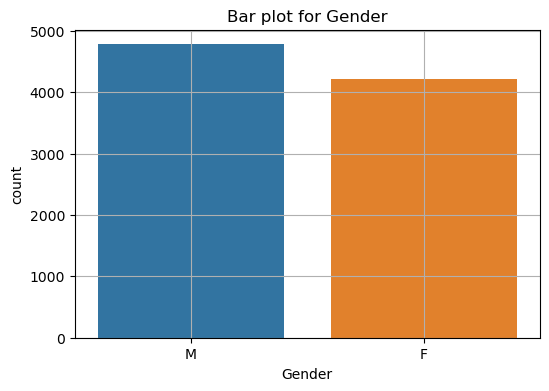

In [9]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Gender', data=df)
plt.title('Bar plot for Gender')
plt.grid()
plt.show()

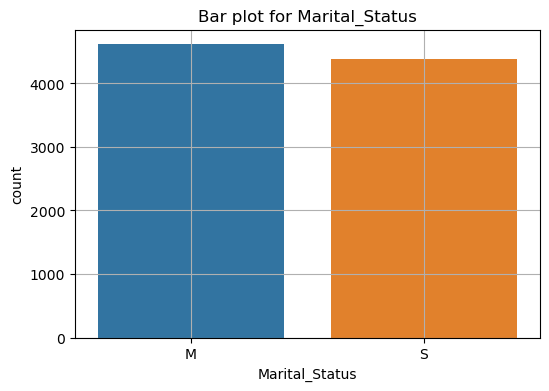

In [10]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Marital_Status', data=df)
plt.title('Bar plot for Marital_Status')
plt.grid()
plt.show()

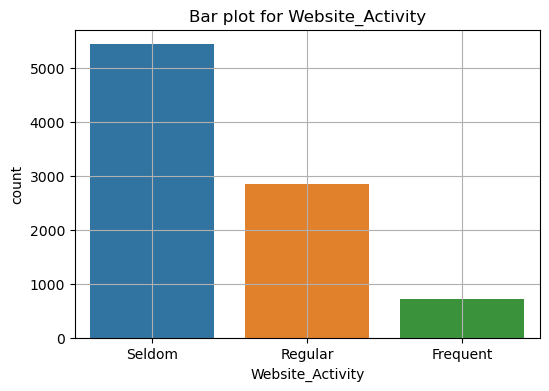

In [11]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Website_Activity', data=df)
plt.title('Bar plot for Website_Activity')
plt.grid()
plt.show()

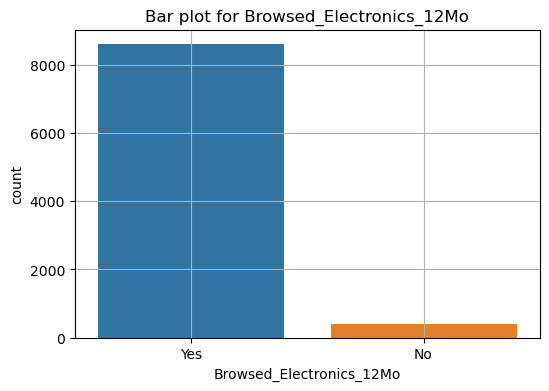

In [12]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Browsed_Electronics_12Mo', data=df)
plt.title('Bar plot for Browsed_Electronics_12Mo')
plt.grid()
plt.show()
# The data is unbalanced, which could lead to errors when building a machine learning model.

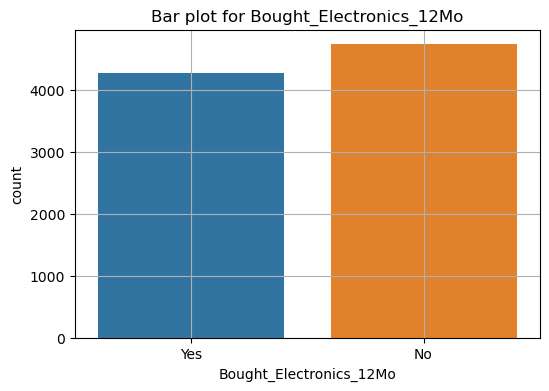

In [13]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Bought_Electronics_12Mo', data=df)
plt.title('Bar plot for Bought_Electronics_12Mo')
plt.grid()
plt.show()

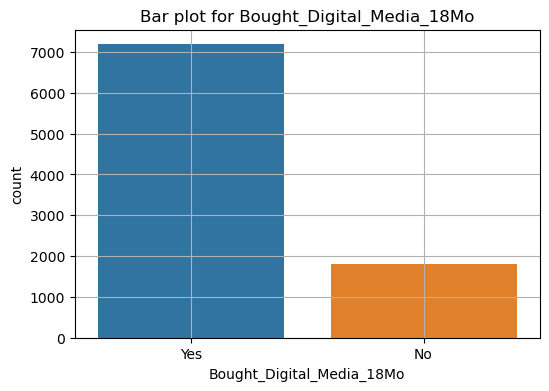

In [14]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Bought_Digital_Media_18Mo', data=df)
plt.title('Bar plot for Bought_Digital_Media_18Mo')
plt.grid()
plt.show()
# The data is unbalanced, which could lead to errors when building a machine learning model.

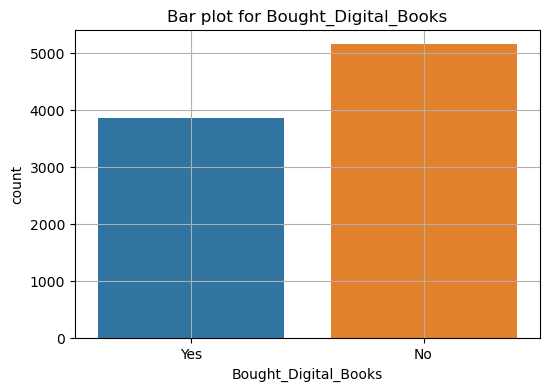

In [15]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Bought_Digital_Books', data=df)
plt.title('Bar plot for Bought_Digital_Books')
plt.grid()
plt.show()

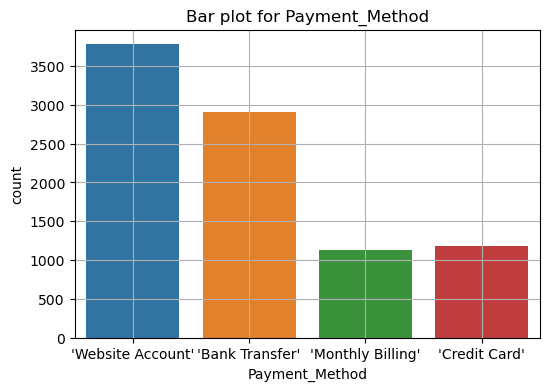

In [16]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Payment_Method', data=df)
plt.title('Bar plot for Payment_Method')
plt.grid()
plt.show()

### **A3. Using python, explore your data set and identify any outliers, clusters of similar instances, "interesting" attributes and specific values of those attributes. Note that you may need to 'temporarily' recode attributes to numeric. In the report include the corresponding snapshots from the tools and explanation of what has been identified there. Hint: please consider scatter plots.**

In [17]:
# Convert to numeric because I want to make a heatmap
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [18]:
df.dtypes

User_ID                      int64
Gender                       int32
Age                          int64
Marital_Status               int32
Website_Activity             int32
Browsed_Electronics_12Mo     int32
Bought_Electronics_12Mo      int32
Bought_Digital_Media_18Mo    int32
Bought_Digital_Books         int32
Payment_Method               int32
dtype: object

### **As you can see inside the heatmap, there are no strong correlations between the features :( but trust me I can smell something 👃**

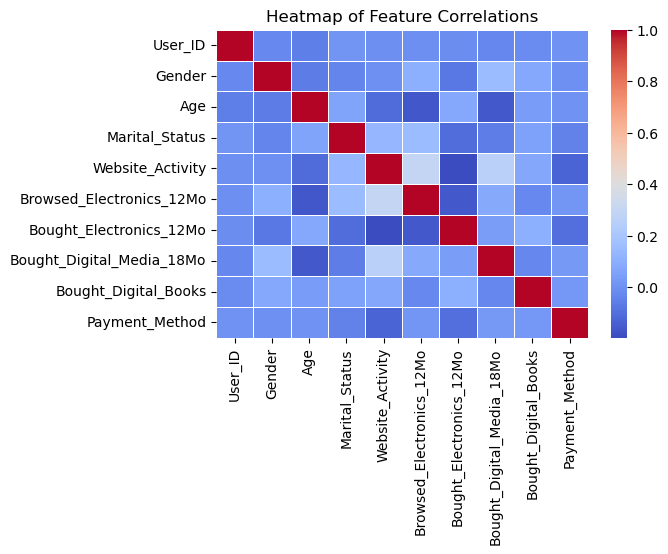

In [19]:
plt.figure(figsize=(6, 4)) 
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

### **As you can see in this plot the most ages in our website or whatever it is between 40-60 years old, so let's do another plot below it and see how those people pay for their things 😉**

B:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


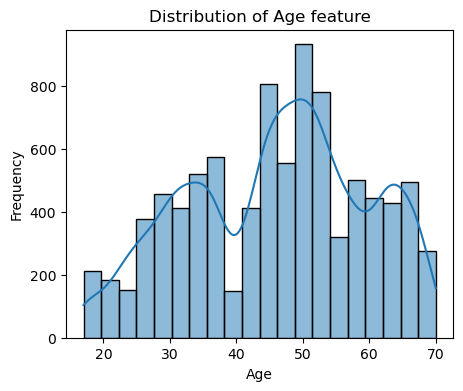

In [20]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df['Age'], bins=20, kde=True)
plt.title('Distribution of Age feature')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### before plotting let's relabel the feature Payment_Methods because it will be easier to understand

In [21]:
# Credit Card: 1, Website Account: 3, Bank Transfer: 0, Monthly Billing: 2
df['Payment_Method'] = df['Payment_Method'].map({1:'Credit Card', 3:'Website Account',
                                                0:'Bank Transfer', 2:'Monthly Billing'})

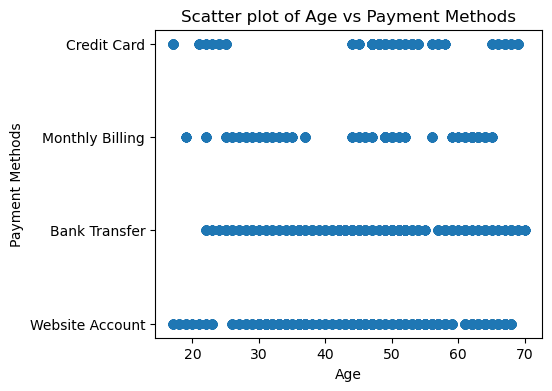

In [22]:
plt.figure(figsize=(5, 4))
plt.scatter(df['Age'], df['Payment_Method'])
plt.xlabel('Age')
plt.ylabel('Payment Methods')
plt.title('Scatter plot of Age vs Payment Methods')
plt.show()

In [23]:
Q1 = df['Age'].quantile(0.25) # 17
Q3 = df['Age'].quantile(0.75) # 56
IQR = Q3 - Q1
threshold = 0.66
outliers = df['Age'][(df['Age'] < (Q1 - threshold * IQR)) | (df['Age'] > (Q3 + threshold * IQR))]

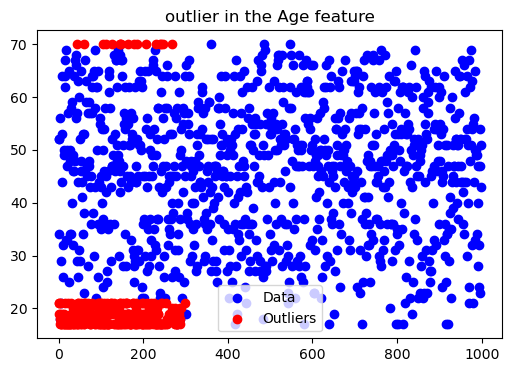

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(range(len(df['Age'].iloc[:1000])), df['Age'].iloc[:1000], color='b', label='Data')
plt.scatter(outliers.index, outliers, color='r', label='Outliers')
plt.title('outlier in the Age feature')
plt.legend()
plt.show()

### **As you can see in the boxplot below, the outlier are the ages that almost under the 20 and above 70** 🔥

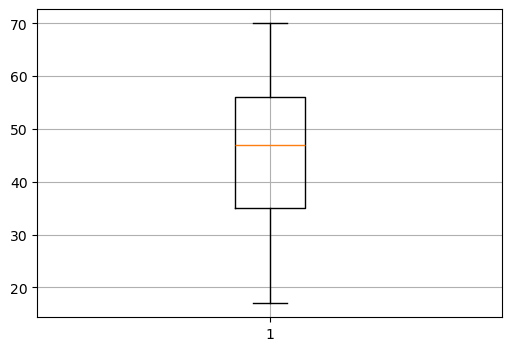

In [25]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Age'])
plt.grid()
plt.show()

## **B. Data pre-processing**

### **B1. Use the following techniques to normalise the "Age" attribute:**
- #### min-max normalization to transform the values onto the range [0.0-1.0].
- #### z-score normalization to transform the values.

In [26]:
scaler = MinMaxScaler()
df_Age_MinMax = scaler.fit_transform(df[['Age']])

In [27]:
scaler = StandardScaler() # Z-score
df_Age_StandardScaler = scaler.fit_transform(df[['Age']])

### **B2. Discretise the Age attribute into the following categories:**
- #### Teenager = 1-16
- #### Young = 17-35
- #### Mid_Age = 36-55
- #### Mature = 56-70
- #### Old = 71+

In [28]:
Teenager = df['Age'][(df['Age'] >= 1) & (df['Age'] <= 16)]
print("Teenager: ", len(Teenager))

Young = df['Age'][(df['Age'] >= 17) & (df['Age'] <= 35)]
print("Young: ", len(Young))

Mid_Age = df['Age'][(df['Age'] >= 36) & (df['Age'] <= 55)]
print("Mid_Age: ", len(Mid_Age))

Mature = df['Age'][(df['Age'] >= 56) & (df['Age'] <= 70)]
print("Mature: ", len(Mature))

Old = df['Age'][df['Age'] >= 71]
print("Old: ", len(Old))

Teenager:  0
Young:  2316
Mid_Age:  4378
Mature:  2306
Old:  0


In [29]:
# Find the maximum length to extend all the arrays to it's length by filling them null values.
max_length = max(len(df_Age_MinMax), len(df_Age_StandardScaler), len(df['Age']),\
                 len(Teenager), len(Young), len(Mid_Age), len(Mature), len(Old), len(df['Gender']))

# Create a function to extend the arrays
def extend_array(arr, length):
    return np.concatenate((arr, np.full(length - len(arr), np.nan)))

# Extend the arrays
df_Age_MinMax = extend_array(df_Age_MinMax.ravel(), max_length)
df_Age_StandardScaler = extend_array(df_Age_StandardScaler.ravel(), max_length)
df_Age = extend_array(df['Age'].ravel(), max_length)
Teenager = extend_array(Teenager.ravel(), max_length)
Young = extend_array(Young.ravel(), max_length)
Mid_Age = extend_array(Mid_Age.ravel(), max_length)
Mature = extend_array(Mature.ravel(), max_length)
Old = extend_array(Old.ravel(), max_length)
df_Gender = extend_array(df['Gender'].ravel(), max_length)

# Create the DataFrame
selected_data = pd.DataFrame({
    'MinMax': df_Age_MinMax, 
    'Z-score': df_Age_StandardScaler,
    'Age': df_Age, 
    'Teenager': Teenager,
    'Young': Young,
    'Mid_Age': Mid_Age, 
    'Mature': Mature, 
    'Old': Old,
    'Gender': df_Gender
})

# Save to csv
selected_data.to_csv('B.csv', index=False)

## **B3. Convert the "Gender" variable into binary variables [with values "0" or "1"].**
### **we did this step when we did the LabelEncoder**